In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# EDA

# Data Cleansing and Preprocessing

In [ ]:
df[["LotFrontage","LotArea", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", 
      "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars", 
    "GarageArea"]].isna().any()

In [ ]:
df['LotFrontage'].fillna(df["LotFrontage"].mean(), inplace = True)
df['MasVnrArea'].fillna(df["MasVnrArea"].mean(), inplace = True)

## Encoding

In [ ]:
df[["MSZoning", "SalePrice"]].groupby("MSZoning").mean().sort_values(by = ["SalePrice"], ascending = False)

In [ ]:
df[["SaleCondition", "SalePrice"]].groupby("SaleCondition").mean().sort_values(by = ["SalePrice"], ascending = False)

In [ ]:
df.loc[df['SaleCondition'] == "Partial", 'SaleCondition'] = 214014
df.loc[df['SaleCondition'] == "Normal", 'SaleCondition'] = 175202
df.loc[df['SaleCondition'] == "Alloca", 'SaleCondition'] = 167377
df.loc[df['SaleCondition'] == "Family", 'SaleCondition'] = 1496526
df.loc[df['SaleCondition'] == "Abnorml", 'SaleCondition'] = 146525
df.loc[df['SaleCondition'] == "AdjLand", 'SaleCondition'] = 104125

In [ ]:
df.loc[df['MSZoning'] == "FV", 'MSZoning'] = 214014
df.loc[df['MSZoning'] == "RL", 'MSZoning'] = 191004
df.loc[df['MSZoning'] == "RH", 'MSZoning'] = 131558
df.loc[df['MSZoning'] == "RM", 'MSZoning'] = 126316
df.loc[df['MSZoning'] == "C (all)", 'MSZoning'] = 74528

In [ ]:
df[["MiscFeature", "SalePrice"]].groupby("MiscFeature").mean().sort_values(by = ["SalePrice"], ascending = False)

In [ ]:
df.loc[df['MiscFeature'] == "TenC", 'MiscFeature'] = 250000
df.loc[df['MiscFeature'] == "Gar2", 'MiscFeature'] = 170750
df.loc[df['MiscFeature'] == "Shed", 'MiscFeature'] = 151187
df.loc[df['MiscFeature'] == "Othr", 'MiscFeature'] = 94000
df['MiscFeature'].fillna(df["SalePrice"].mean(), inplace = True)

In [ ]:
df[["Neighborhood", "SalePrice"]].groupby("Neighborhood").mean().sort_values(by = ["SalePrice"], ascending = False)

In [ ]:
df.loc[df['Neighborhood'] == "NoRidge", 'Neighborhood'] = 335295
df.loc[df['Neighborhood'] == "NridgHt", 'Neighborhood'] = 316270
df.loc[df['Neighborhood'] == "StoneBr", 'Neighborhood'] = 310499
df.loc[df['Neighborhood'] == "Timber", 'Neighborhood'] = 242247
df.loc[df['Neighborhood'] == "Veenker", 'Neighborhood'] = 238772
df.loc[df['Neighborhood'] == "Somerst", 'Neighborhood'] = 225379
df.loc[df['Neighborhood'] == "ClearCr", 'Neighborhood'] = 212565
df.loc[df['Neighborhood'] == "Crawfor", 'Neighborhood'] = 210624
df.loc[df['Neighborhood'] == "CollgCr", 'Neighborhood'] = 197965
df.loc[df['Neighborhood'] == "Blmngtn", 'Neighborhood'] = 194870
df.loc[df['Neighborhood'] == "Gilbert", 'Neighborhood'] = 192854
df.loc[df['Neighborhood'] == "NWAmes", 'Neighborhood'] = 189050
df.loc[df['Neighborhood'] == "SawyerW", 'Neighborhood'] = 186555
df.loc[df['Neighborhood'] == "Mitchel", 'Neighborhood'] = 156270
df.loc[df['Neighborhood'] == "NAmes", 'Neighborhood'] = 145847
df.loc[df['Neighborhood'] == "NPkVill", 'Neighborhood'] = 142694
df.loc[df['Neighborhood'] == "SWISU", 'Neighborhood'] = 142591
df.loc[df['Neighborhood'] == "Blueste", 'Neighborhood'] = 137500
df.loc[df['Neighborhood'] == "Sawyer", 'Neighborhood'] = 136793
df.loc[df['Neighborhood'] == "OldTown", 'Neighborhood'] = 128225
df.loc[df['Neighborhood'] == "Edwards", 'Neighborhood'] = 128219
df.loc[df['Neighborhood'] == "BrkSide", 'Neighborhood'] = 124834
df.loc[df['Neighborhood'] == "BrDale", 'Neighborhood'] = 104493
df.loc[df['Neighborhood'] == "IDOTRR", 'Neighborhood'] = 100123
df.loc[df['Neighborhood'] == "MeadowV", 'Neighborhood'] = 98576

## Standardization

In [10]:
import matplotlib.pyplot as plt
def plot(x,y):
    plt.scatter(x, y, alpha=0.5)
    plt.show()
    return

In [11]:
training_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [12]:
from sklearn import preprocessing
def processing(df):
    df_numerical = df[["LotFrontage","LotArea", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", 
      "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars", 
    "GarageArea","SalePrice"]].to_numpy()
    df_categorical = df[["MSZoning"]].to_numpy()
    X_cat = []
    X_num = []
    y = []
    for i in range(len(df_numerical)):
        if np.isnan(df_numerical[i]).any():
            continue
        X_num.append(df_numerical[i][:-1])
        X_cat.append(df_categorical[i])
        y.append(df_numerical[i][-1])
    X_cat = np.array(X_cat)
    X_num = np.array(X_num)
    y = np.array(y)
    return X_cat, X_num ,y

In [13]:
X_cat_train, X_num_train, y_train = processing(training_df)
X_cat_test, X_num_test, y_test = processing(test_df)

In [14]:
print(X_cat_train.shape)
#X_cat_train = np.delete(X_cat_train,[1298,523],axis = 0)
#X_num_train = np.delete(X_num_train,[1298,523],axis = 0)
#y_train = np.delete(y_train,[1298,523],axis = 0)
print(X_cat_train.shape)

(1195, 1)
(1195, 1)


In [15]:
le = preprocessing.LabelEncoder()
le.fit(X_cat_train.flatten())
X_cat_train = le.transform(X_cat_train).reshape(len(X_cat_train),1)
X_cat_test = le.transform(X_cat_test).reshape(len(X_cat_test),1)

/Users/Honey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Honey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-0.          0.42945979 57.52766644 46.01057691 40.17478482 44.04077157
 -0.         20.83371333  0.          0.         -0.         -0.
 -0.          0.         94.40364401]


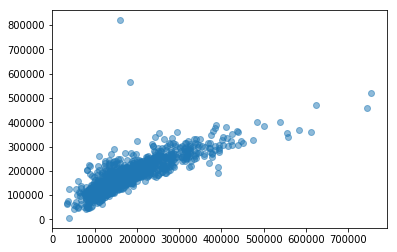

[1156  496 1088 ...  970  434 1063]


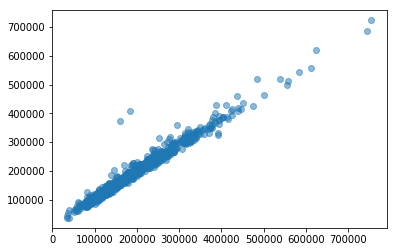

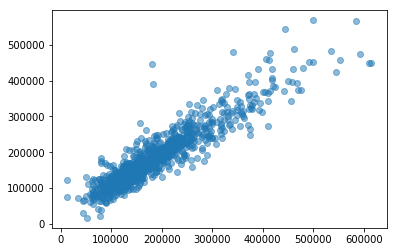

0.13833409047284653 0.04912516593143182
[-0.          0.42945979 57.52766644 46.01057691 40.17478482 44.04077157
 -0.         20.83371333  0.          0.         -0.         -0.
 -0.          0.         94.40364401]


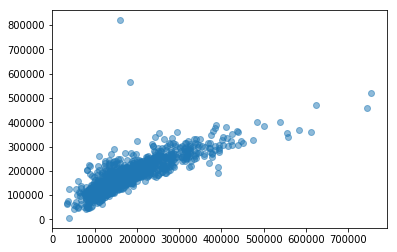

[1156  496 1088 ...  970  434 1063]


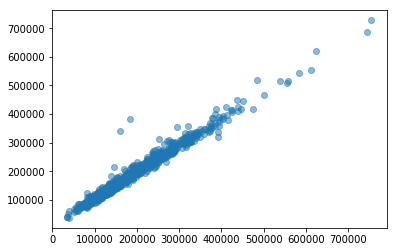

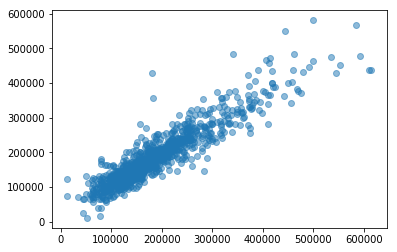

0.13801339228286538 0.04876628194436379
[-0.          0.42945979 57.52766644 46.01057691 40.17478482 44.04077157
 -0.         20.83371333  0.          0.         -0.         -0.
 -0.          0.         94.40364401]


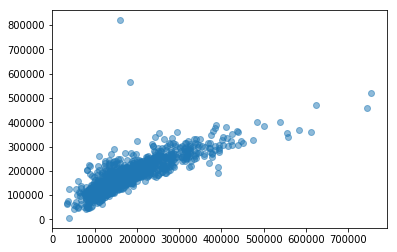

[1156  496 1088 ...  970  434 1063]


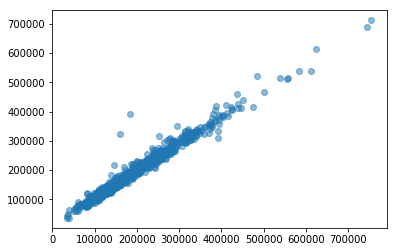

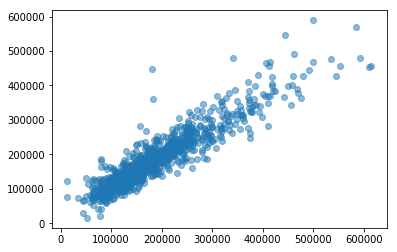

0.13734072123420787 0.049318682377383766


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
for i in range(3):
    #linear = LinearRegression()
    linear = linear_model.Lasso(alpha=100000)
    linear.fit(X_num_train, y_train)
    print(linear.coef_)
    residual = y_train - linear.predict(X_num_train)
    plot(y_train, linear.predict(X_num_train))
    print(np.argsort(np.abs(residual)))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 200)
    #rf = MLPRegressor(hidden_layer_sizes = (20,20,20),activation="relu", verbose=True, max_iter = 1000, learning_rate = 'adaptive', n_iter_no_change = 100)
    rf.fit(np.hstack((X_cat_train,X_num_train)),residual)
    
    y_test_pred = rf.predict(np.hstack((X_cat_test,X_num_test))) + linear.predict(X_num_test)
    y_train_pred = rf.predict(np.hstack((X_cat_train,X_num_train))) + linear.predict(X_num_train)
    plot(y_train, y_train_pred)
    plot(y_test, y_test_pred)
    mape_test = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape_test, mape_train)

In [42]:
for x in X_cat_train:
    print(x)

[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[4]
[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[1]
[4]
[3]
[3]
[4]
[4]
[3]
[3]
[3]
[1]
[3]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[4]
[4]
[3]
[4]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[1]
[0]
[3]
[3]
[3]
[3]
[0]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[1]
[4]
[4]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[1]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[4]
[4]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[1]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[1]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[4]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[1]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[4]
[3]
[4]
[3]
[3]
[3]
[3]
[4]
[3]
[3]
[4]
[3]
[3]
[3]
[3]
[1]
[4]
[4]
[3]
[3]
[3]
[4]
[3]
[3]
[3]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
for i in range(3):
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    residual = y_train - linear.predict(X_train)
    plot(y_train, linear.predict(X_train))
    rf = RandomForestRegressor(criterion = "mae", n_estimators = 1000)
    #rf = MLPRegressor(hidden_layer_sizes = (10,10,10,10), max_iter = 20000, learning_rate = 'adaptive', n_iter_no_change = 500, verbose = True)
    rf.fit(X_train,residual)
    
    y_test_pred = (rf.predict(X_test)) + linear.predict(X_test)
    y_train_pred = (rf.predict(X_train)) + linear.predict(X_train)
    plot(y_train, y_train_pred)
    plot(y_test, y_test_pred)
    mape_test = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape_test, mape_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
for i in range(3):
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    residual = y_train - linear.predict(X_train)
    
    y_test_pred = linear.predict(X_test)
    y_train_pred = linear.predict(X_train)
    plot(y_train, y_train_pred)
    plot(y_test, y_test_pred)
    mape_test = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape_test, mape_train)

In [ ]:
std_scalar_model = StandardScaler()
ln_part = std_scalar_model.fit_transform(df[["MSZoning", "Neighborhood", "TotalBsmtSF", "LotArea", "GrLivArea", "TotRmsAbvGrd", "MiscFeature"]].to_numpy())
nln_part = df[["OverallQual", "OverallCond", "YearBuilt"]].to_numpy()
std_feature = np.hstack((ln_part,nln_part))

# Cross Validation

In [ ]:
X = std_feature
X

In [ ]:
y = df.loc[: ,"SalePrice"].to_numpy()
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    linear = LinearRegression()
    linear.fit(X_train[:,:7], y_train)
    residual = y_train - linear.predict(X_train[:,:7])
    #plot(y_train, linear.predict(X_train[:,:7]))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    #rf = MLPRegressor(hidden_layer_sizes = (10,10,10,10), max_iter = 20000, learning_rate = 'adaptive', n_iter_no_change = 500, verbose = True)
    rf.fit(X_train,residual)
    
    
    y_test_pred = rf.predict(X_test) + linear.predict(X_test[:,:7])
    y_train_pred = rf.predict(X_train) + linear.predict(X_train[:,:7])
    #plot(y_train, y_train_pred)
    #plot(y_test, y_test_pred)
    mape = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regr = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    y_train_pred = regr.predict(X_train)
    mape = 1- np.mean(np.abs(y_pred - y_test)/y_test)
    mape_train = 1- np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train)

# Test Data

In [ ]:
test = pd.read_csv("test.csv") 
test.head()

In [ ]:
test[["LotFrontage","LotArea", "MasVnrArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", 
      "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "GarageCars", 
    "GarageArea"]].isna().any()

In [ ]:
test['LotFrontage'].fillna(df["LotFrontage"].mean(), inplace = True)
test['MasVnrArea'].fillna(df["MasVnrArea"].mean(), inplace = True)
test['GarageCars'].fillna(df["GarageCars"].mean(), inplace = True)
test['GarageArea'].fillna(df["GarageArea"].mean(), inplace = True)

In [ ]:
test['TotalBsmtSF'].fillna(test["TotalBsmtSF"].mean(), inplace = True)
# test['MSZoning'].fillna(test["MSZoning"].mode(), inplace = True)      fill nan with mode manually
test['MiscFeature'].fillna(test["SalePrice"].mean(), inplace = True)

In [ ]:
test[["OverallQual","OverallCond", "GrLivArea", "LotArea", "TotalBsmtSF", "MSZoning", "Neighborhood", "TotRmsAbvGrd", 
      "MiscFeature", "FullBath"]].isna().any()

In [ ]:
test.loc[test['MSZoning'] == "FV", 'MSZoning'] = 214014
test.loc[test['MSZoning'] == "RL", 'MSZoning'] = 191004
test.loc[test['MSZoning'] == "RH", 'MSZoning'] = 131558
test.loc[test['MSZoning'] == "RM", 'MSZoning'] = 126316
test.loc[test['MSZoning'] == "C (all)", 'MSZoning'] = 74528

In [ ]:
test.loc[test['SaleCondition'] == "Partial", 'SaleCondition'] = 214014
test.loc[test['SaleCondition'] == "Normal", 'SaleCondition'] = 175202
test.loc[test['SaleCondition'] == "Alloca", 'SaleCondition'] = 167377
test.loc[test['SaleCondition'] == "Family", 'SaleCondition'] = 1496526
test.loc[test['SaleCondition'] == "Abnorml", 'SaleCondition'] = 146525
test.loc[test['SaleCondition'] == "AdjLand", 'SaleCondition'] = 104125

In [ ]:
test.loc[test['MiscFeature'] == "TenC", 'MiscFeature'] = 250000
test.loc[test['MiscFeature'] == "Gar2", 'MiscFeature'] = 170750
test.loc[test['MiscFeature'] == "Shed", 'MiscFeature'] = 151187
test.loc[test['MiscFeature'] == "Othr", 'MiscFeature'] = 94000

In [ ]:
test.loc[test['Neighborhood'] == "NoRidge", 'Neighborhood'] = 335295
test.loc[test['Neighborhood'] == "NridgHt", 'Neighborhood'] = 316270
test.loc[test['Neighborhood'] == "StoneBr", 'Neighborhood'] = 310499
test.loc[test['Neighborhood'] == "Timber", 'Neighborhood'] = 242247
test.loc[test['Neighborhood'] == "Veenker", 'Neighborhood'] = 238772
test.loc[test['Neighborhood'] == "Somerst", 'Neighborhood'] = 225379
test.loc[test['Neighborhood'] == "ClearCr", 'Neighborhood'] = 212565
test.loc[test['Neighborhood'] == "Crawfor", 'Neighborhood'] = 210624
test.loc[test['Neighborhood'] == "CollgCr", 'Neighborhood'] = 197965
test.loc[test['Neighborhood'] == "Blmngtn", 'Neighborhood'] = 194870
test.loc[test['Neighborhood'] == "Gilbert", 'Neighborhood'] = 192854
test.loc[test['Neighborhood'] == "NWAmes", 'Neighborhood'] = 189050
test.loc[test['Neighborhood'] == "SawyerW", 'Neighborhood'] = 186555
test.loc[test['Neighborhood'] == "Mitchel", 'Neighborhood'] = 156270
test.loc[test['Neighborhood'] == "NAmes", 'Neighborhood'] = 145847
test.loc[test['Neighborhood'] == "NPkVill", 'Neighborhood'] = 142694
test.loc[test['Neighborhood'] == "SWISU", 'Neighborhood'] = 142591
test.loc[test['Neighborhood'] == "Blueste", 'Neighborhood'] = 137500
test.loc[test['Neighborhood'] == "Sawyer", 'Neighborhood'] = 136793
test.loc[test['Neighborhood'] == "OldTown", 'Neighborhood'] = 128225
test.loc[test['Neighborhood'] == "Edwards", 'Neighborhood'] = 128219
test.loc[test['Neighborhood'] == "BrkSide", 'Neighborhood'] = 124834
test.loc[test['Neighborhood'] == "BrDale", 'Neighborhood'] = 104493
test.loc[test['Neighborhood'] == "IDOTRR", 'Neighborhood'] = 100123
test.loc[test['Neighborhood'] == "MeadowV", 'Neighborhood'] = 98576

In [ ]:
test_std_scalar_model = StandardScaler()
test_ln_part = test_std_scalar_model.fit_transform(test[["MSZoning", "Neighborhood", "TotalBsmtSF", "LotArea", "GrLivArea", "TotRmsAbvGrd", "MiscFeature"]].to_numpy())
test_nln_part = test[["OverallQual", "OverallCond", "YearBuilt"]].to_numpy()
test_std_feature = np.hstack((test_ln_part,test_nln_part))

In [ ]:
X_test = test_std_feature
X_test

In [ ]:
y_test = test.loc[: ,"SalePrice"].to_numpy()
y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
X_train = X
y_train = y
for i in range(10):
    linear = LinearRegression()
    linear.fit(X_train[:,:6], y_train)
    residual = y_train - linear.predict(X_train[:,:6])
    #plot(y_train, linear.predict(X_train[:,:4]))
    rf = RandomForestRegressor(criterion = "mse", n_estimators = 45)
    #rf = MLPRegressor(hidden_layer_sizes = (10,10,10,10), max_iter = 20000, learning_rate = 'adaptive', n_iter_no_change = 500, verbose = True)
    rf.fit(X_train,residual)
    y_test_pred = rf.predict(X_test) + linear.predict(X_test[:,:6])
    y_train_pred = rf.predict(X_train) + linear.predict(X_train[:,:6])
    #plot(y_train, y_train_pred)
    #plot(y_test, y_test_pred)
    mape = np.mean(np.abs(y_test_pred - y_test)/y_test)
    mape_train = np.mean(np.abs(y_train_pred - y_train)/y_train)
    print(mape, mape_train, y_test_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(criterion = "mse", n_estimators = 45)
regr.fit(X, y)
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X)
mape = np.mean(np.abs(y_pred - y_test)/y_test)
mape_train = np.mean(np.abs(y - y_train_pred)/y)
print(mape, mape_train)
#for i, y in enumerate(y_pred):
#    print( y, y_test[i])